# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Stevanus Sembiring]
- **Email:** [m180d4ky2433@bangkit.academy]
- **ID Dicoding:** [stevanussmbrng]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca & musim terhadap penggunaan sepeda?
- Bagaimana pengaruh bulan dan hari tertentu terhadap penggunaan sepeda?
- Bagaimana pola/tren waktu pada penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
# Load Data Day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Load Data Hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Data Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum()

0

- Tidak terdapat missing value pada data hour
- Tidak terdapat data duplikat pada data hour
- Tidak terdapat masalah tipe data pada data hour kecuali `dteday` yang seharusnya bertipe data datetime
  
Secara keseluruhan data hour tidak terdapat masalah kecuali tipe data `dteday`

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Secara keseluruhan tidak terdapat keanehan pada data day, tetapi yang dapat diperhatikan adalah:
- Kolom `holiday`: Standar deviasi (std) kolom `holiday` sangat rendah (0.167155), tetapi median (50%) dan kuartil bawah (25%) adalah 0. Hal ini menunjukkan bahwa sebagian besar data pada kolom "holiday" memiliki nilai yang sama (0), sementara hanya sedikit yang memiliki nilai 1. Ini bisa jadi menunjukkan bahwa sebagian besar hari dalam dataset bukan hari libur.
- Kolom `casual` dan `registered`: Terdapat perbedaan yang cukup besar antara nilai maksimum (max) dan kuartil atas (75%) dari kolom `casual` dan `registered`. Hal ini menunjukkan adanya potensi outlier atau pola distribusi yang tidak simetris pada kedua kolom ini.
- Kolom `cnt`: Standar deviasi (std) dari kolom `cnt` cukup besar (1937.211452), yang menunjukkan variasi yang signifikan dalam jumlah sepeda yang dipinjam. Hal ini juga dapat menunjukkan keberagaman pola penggunaan sepeda dari waktu ke waktu.

#### Data hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

0

- Tidak terdapat missing value pada data hour
- Tidak terdapat data duplikat pada data hour
- Tidak terdapat masalah tipe data pada data hour kecuali `dteday` yang seharusnya bertipe data datetime
  
Secara keseluruhan data hour tidak terdapat masalah kecuali tipe data `dteday`

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Secara keseluruhan tidak terdapat keanehan dalam data hour, tetapi yang dapat diperhatikan adalah:
- Kolom `holiday`: Standar deviasi (std) kolom `holiday` juga sangat rendah (0.167165), sementara median (50%) dan kuartil bawah (25%) adalah 0. Hal ini menunjukkan pola yang mirip dengan data sebelumnya, di mana sebagian besar data memiliki nilai 0 (bukan hari libur).
- Kolom `casual` dan `registered`: Terdapat perbedaan yang cukup besar antara nilai maksimum (max) dan kuartil atas (75%) dari kolom `casual` dan `registered`. Hal ini menunjukkan adanya potensi outlier atau pola distribusi yang tidak simetris pada kedua kolom ini, seperti pada data sebelumnya.
- Kolom `cnt`: Standar deviasi (std) dari kolom `cnt` juga cukup besar (181.387599), menunjukkan variasi yang signifikan dalam jumlah sepeda yang dipinjam pada tingkat jam.

### Cleaning Data

In [12]:
# mengubah tipe data "dteday" menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df['dteday'])
hour_df["dteday"] = pd.to_datetime(hour_df['dteday'])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat dari output di atas bahwa tipe data variabel `dteday` sudah berubah menjadi datetime

In [15]:
# Membuat dictionary untuk mapping nilai dummy ke teks
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_mapping = {0: '2011', 1:'2012'}
# Mengganti nilai dummy dengan teks menggunakan metode replace
day_df['season'] = day_df['season'].replace(season_mapping)
day_df['yr'] = day_df['yr'].replace(year_mapping)
hour_df['season'] = hour_df['season'].replace(season_mapping)
hour_df['yr'] = hour_df['yr'].replace(year_mapping)

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
# Menyimpan data yang sudah bersih untuk penggunaan dashboard
day_df.to_csv("day_df_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

### Pivot Table Penggunaan Sepada

In [19]:
# Membuat pivot table berdasarkan musim 
pivot_season_weekday = day_df.pivot_table(index='season', columns='weekday', values='cnt', aggfunc='sum')

print(pivot_season_weekday)

weekday        0       1       2       3       4       5       6
season                                                          
Fall      138431  146307  152715  158054  159561  155267  150794
Springer   60195   63771   69813   65277   72355   74264   65673
Summer    129650  123255  125449  130547  135207  135792  138689
Winter    115751  122170  121132  119170  118272  122467  122651


Dapat dilihat dari pivot table bahwa rata-rata sepeda banyak disewa pada musim gugur dan rata-rata paling sedikit pada musim semi

In [20]:
# Membuat pivot table berdasarkan tahun dan bulan
pivot_year_month = day_df.pivot_table(index='yr', columns='mnth', values='cnt', aggfunc='sum')

print(pivot_year_month)

mnth     1       2       3       4       5       6       7       8       9   \
yr                                                                            
2011  38189   48215   64045   94870  135821  143512  141341  136691  127418   
2012  96744  103137  164875  174224  195865  202830  203607  214503  218573   

mnth      10      11      12  
yr                            
2011  123511  102167   87323  
2012  198841  152664  123713  


Dari pivot table dapat dilihat pada sewa sepeda terbanyak ada pada bulan 8 dan 9 tahun 2012. Terjadi peningkatan penyewaan sepeda dari 2011 sampai 2012

In [21]:
# Membuat pivot table berdasarkan cuaca
pivot_weather = day_df.pivot_table(index='weathersit', values='cnt', aggfunc='sum')

print(pivot_weather)

                cnt
weathersit         
1           2257952
2            996858
3             37869


weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Dilihat dari pivot table bahwa paling banyak orang menyewa sepeda pada saat cuaca cerah, sedikit awan, berawan sebagian, berawan sebagian. Dan tidak ada yang menyewa sepeda pada saat cuaca hujan Lebat + palet Es + badai petir + kabut, salju + kabut

## Visualization & Explanatory Analysis

### Pertanyaan 1:

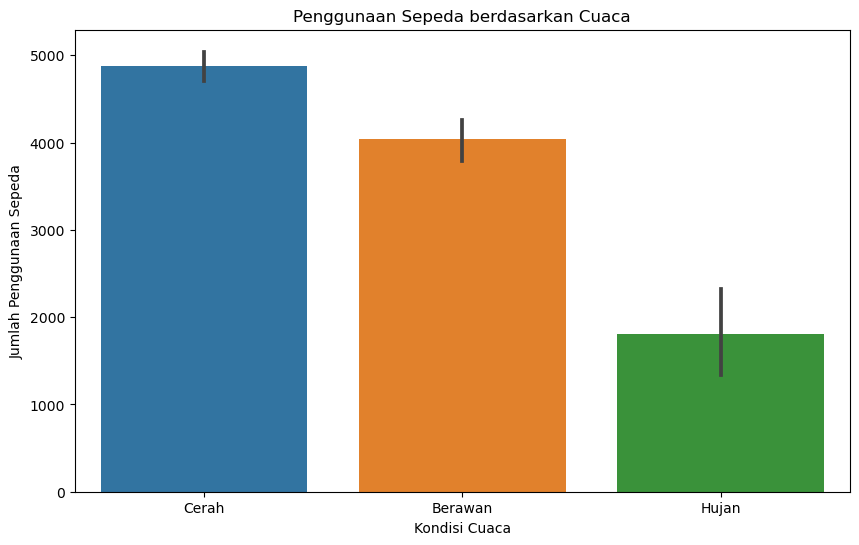

In [22]:
# Visualisasi pengaruh cuaca & musim terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weathersit', y='cnt')
plt.title('Penggunaan Sepeda berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks([0, 1, 2], ['Cerah', 'Berawan', 'Hujan'])
plt.show()

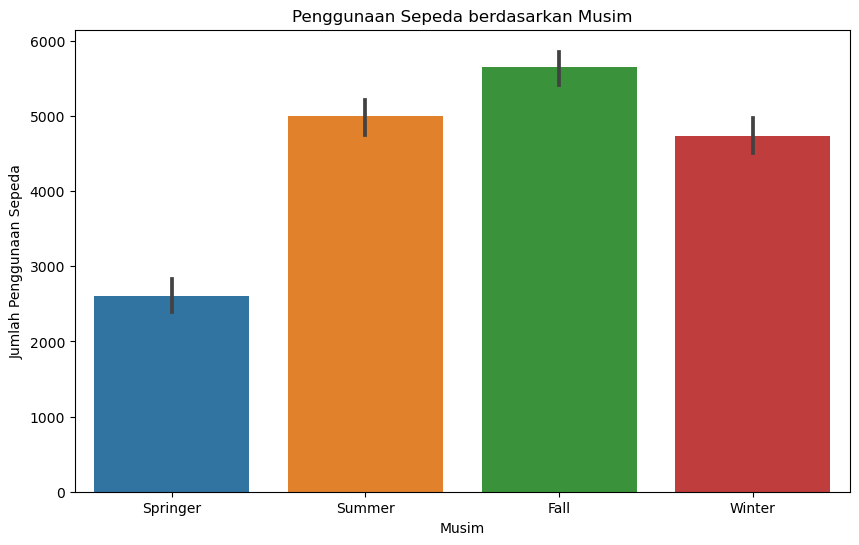

In [23]:
# Visualisasi pengaruh musim terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='season', y='cnt')
plt.title('Penggunaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

### Pertanyaan 2:

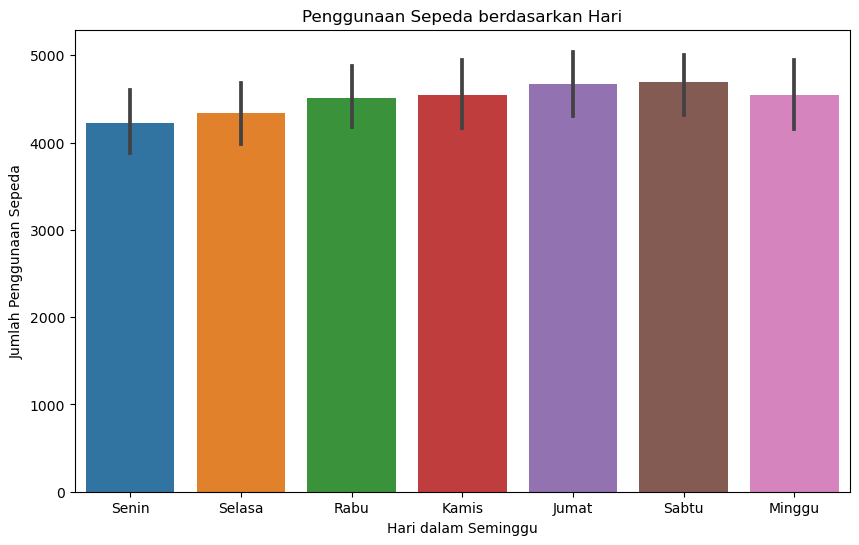

In [24]:
# Visualisasi pengaruh hari terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weekday', y='cnt')
plt.title('Penggunaan Sepeda berdasarkan Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

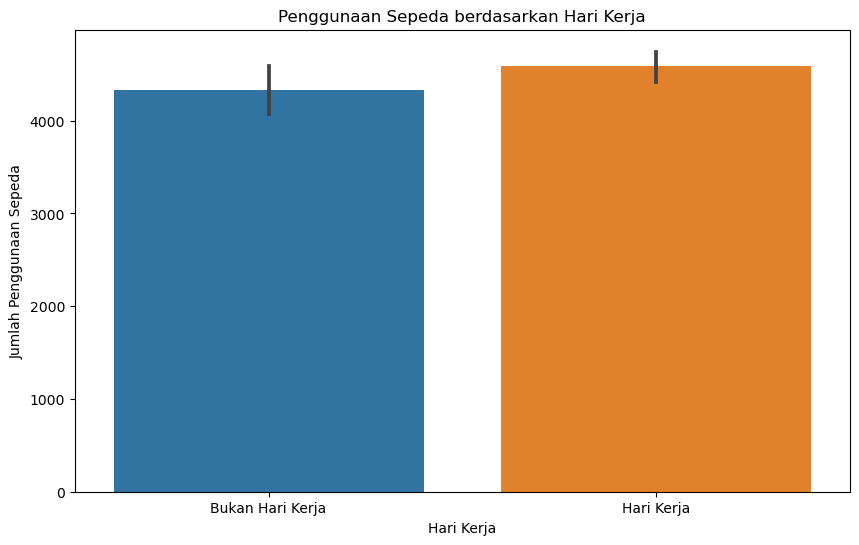

In [25]:
# Visualisasi pengaruh workingday terhadap penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='workingday', y='cnt')
plt.title('Penggunaan Sepeda berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks([0, 1], ['Bukan Hari Kerja', 'Hari Kerja'])
plt.show()

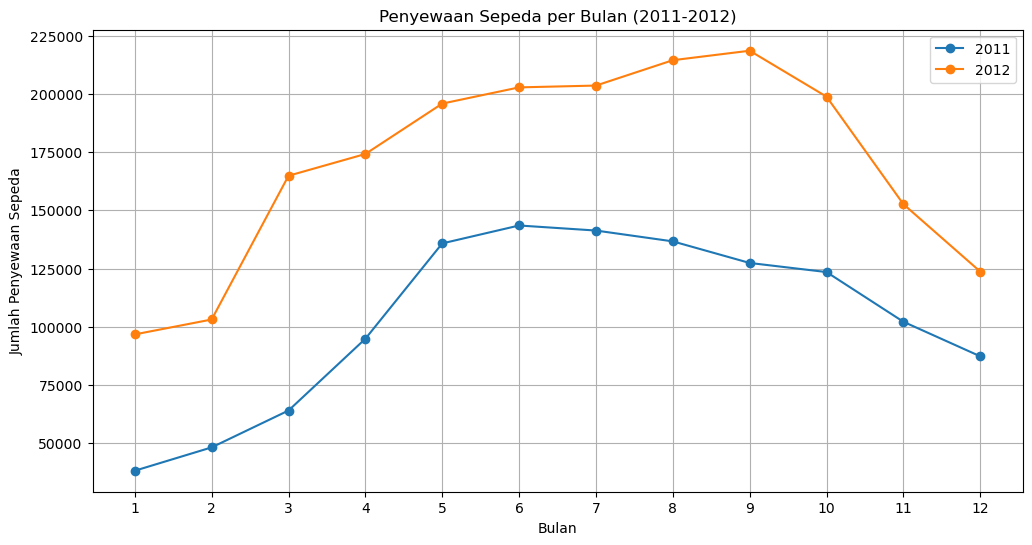

In [26]:
# Filter data untuk tahun 2011 dan 2012
data_2011 = day_df[day_df['yr'] == '2011']
data_2012 = day_df[day_df['yr'] == '2012']

# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan sepeda
monthly_rentals_2011 = data_2011.groupby('mnth')['cnt'].sum()
monthly_rentals_2012 = data_2012.groupby('mnth')['cnt'].sum()

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals_2011.index, monthly_rentals_2011.values, label='2011', marker='o')
plt.plot(monthly_rentals_2012.index, monthly_rentals_2012.values, label='2012', marker='o')

plt.title('Penyewaan Sepeda per Bulan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 3

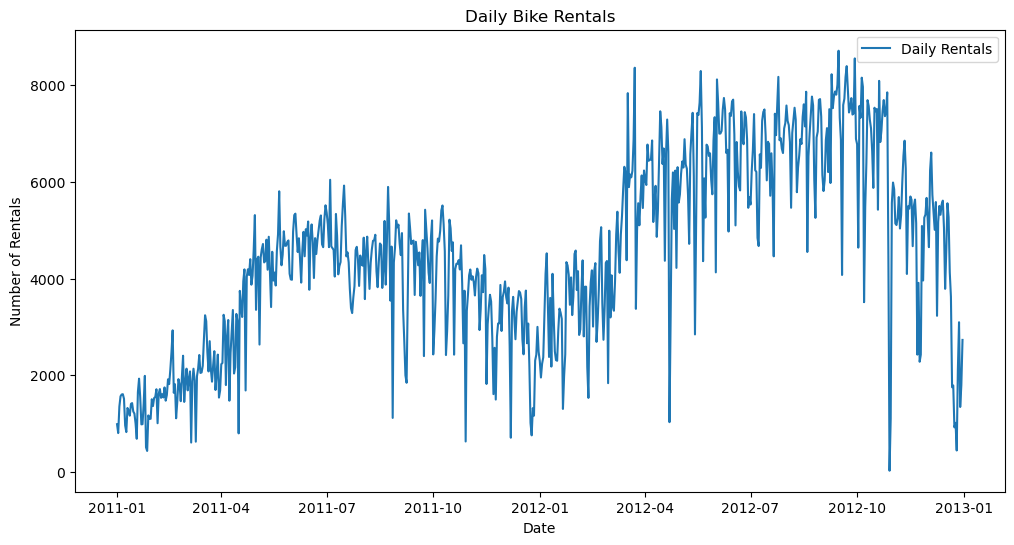

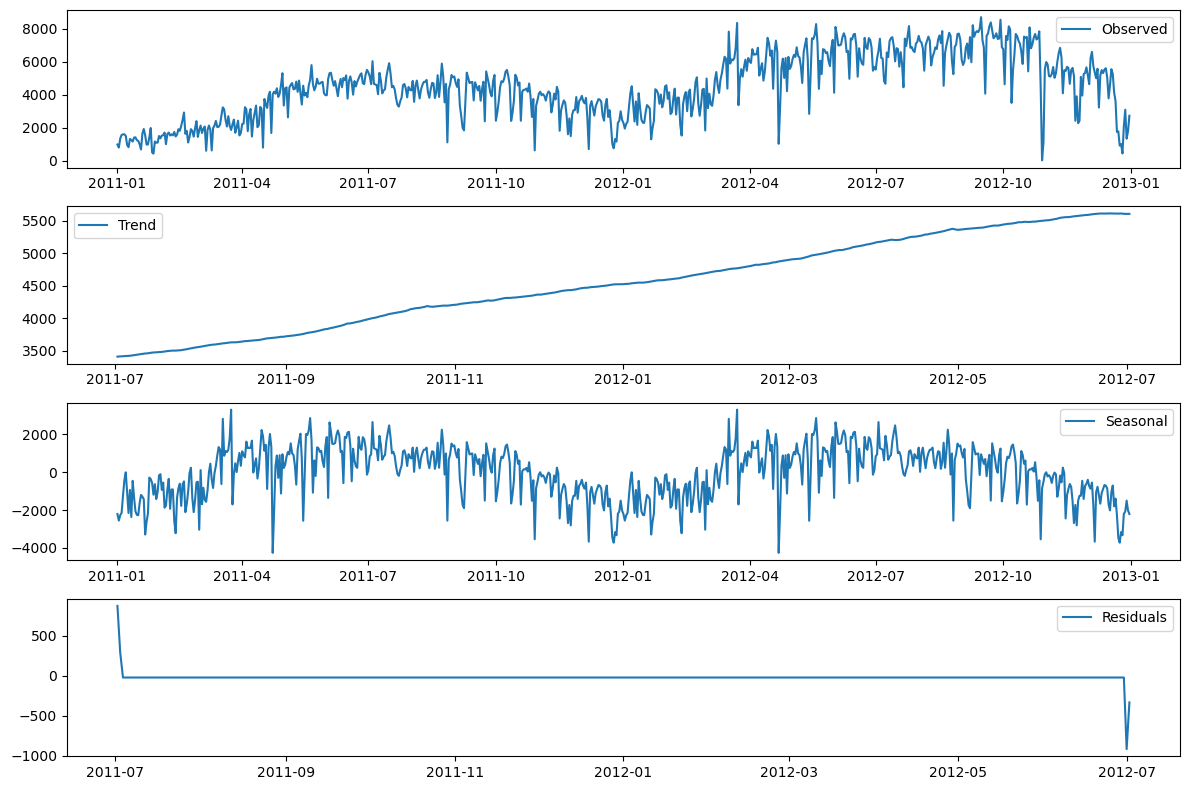

In [27]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah penyewaan sepeda per hari
daily_rentals = hour_df.groupby('dteday')['cnt'].sum()

# Mengubah indeks menjadi tipe data datetime
daily_rentals.index = pd.to_datetime(daily_rentals.index)

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_rentals, label='Daily Rentals')
plt.title('Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

# Dekomposisi musiman menggunakan metode 'additive'
result = seasonal_decompose(daily_rentals, model='additive', period=365)

# Plot hasil dekomposisi
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

Dari plot time series di atas dapat dilihat bagaimana tren waktu dalam penggunaan sepeda

## Conclusion

1. Bagaimana pengaruh cuaca & musim terhadap penggunaan sepeda? <br>
- Pada kondisi cuaca sangat mempengaruhi terhadap penyewaan sepeda, dapat dilihat dari barplot di atas bahwa terdapat tingkatan penggunakan sepeda, yang tertinggi mulai dari cerah, berawam, dan hujan. Hal tersebut menandakan bahwa jumlah penyewaan sepeda akan lebih banyak pada saat cuaca bagus/cerah.
- Pada musim juga berpengaruh dapat dilihat juga dari barplot bahwa musim gugur sangat diminati orang untuk menyewa sepeda dan pada saat musim semi paling sedikit orang untuk menyewa sepeda.   
2. Bagaimana pengaruh bulan dan hari tertentu terhadap penggunaan sepeda? <br>
- Dapat dilihat berdasarkan hari sebenarnya tidak memiliki perbedaan penggunaan sepeda yang signifikan berbeda tetapi yang paling tinggi ada pada hari jumat dan sabtu.
- Jika dilihat dari hari kerja atau tidak juga tidak memiliki perbedaan yang jauh tetapi kebanyakan orang menyewa pada saat hari kerja.
- Kemudian jika dilihat berdasarkan bulan terlihat bahwa di pertengahan tahun pemakaian sepeda cenderung meningkat baik itu tahun 2011 dan 2012
3. Bagaimana pola/tren waktu pada penggunaan sepeda? <br>
- Dalam grafik dapat dilihat bahwa terdapat pola musiman dalam data
- Dapat dilihat bahwa ada tren meningkat dalam data, yaitu jumlah penyewaan sepeda secara umum meningkat dari tahun ke tahun.
- Selain itu, dilihat juga bahwa ada fluktuasi acak dalam data, yaitu variasi yang tidak dapat dijelaskan oleh pola, tren, atau musiman.